## Load and Inspect the Data

In [2]:
# Libraries for loading and handling data
import pandas as pd

# Load the dataset
file_path = 'F:\Data sets\shopping_trends.csv'
data = pd.read_csv(file_path)

# Basic data overview
print("Dataset Info:")
print(data.info())  # Column data types and non-null counts

print("\nFirst 5 Rows of the Dataset:")
print(data.head())  # Display the first few rows

print("\nSummary Statistics:")
print(data.describe())  # Summary statistics for numerical columns


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 

## Check for Duplicates

In [3]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates dropped.")


Number of duplicate rows: 0


## Handle Missing Values

In [4]:
# Check for missing values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Fill missing numerical values with the median
data['Purchase Amount (USD)'] = data['Purchase Amount (USD)'].fillna(data['Purchase Amount (USD)'].median())

# Fill missing categorical values with 'Unknown'
data = data.fillna('Unknown')

print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Missing Values After Handling:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status   

## Standardize Categorical Data

In [5]:
# Standardize 'Yes/No' columns
yes_no_columns = ['Subscription Status', 'Discount Applied', 'Promo Code Used']
data[yes_no_columns] = data[yes_no_columns].apply(lambda x: x.str.strip().str.capitalize())

# Standardize Gender column
data['Gender'] = data['Gender'].str.strip().str.capitalize()


## Feature Engineering

In [23]:
age_bins = [0, 20, 40, 60, 80]
age_labels = ['0-20', '21-40', '41-60', '61-80']

# Bin the Age column into Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
data['Age Group'] = pd.Categorical(data['Age Group'], categories=age_labels, ordered=True)

# Sort the data based on Age Group
data = data.sort_values(by='Age Group')

# Check sorted Age Groups
print("\nSorted Data based on Age Group:")
print(data['Age Group'].value_counts())



Sorted Data based on Age Group:
Age Group
41-60    1503
21-40    1462
61-80     723
0-20      212
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

### Age Group Distribution

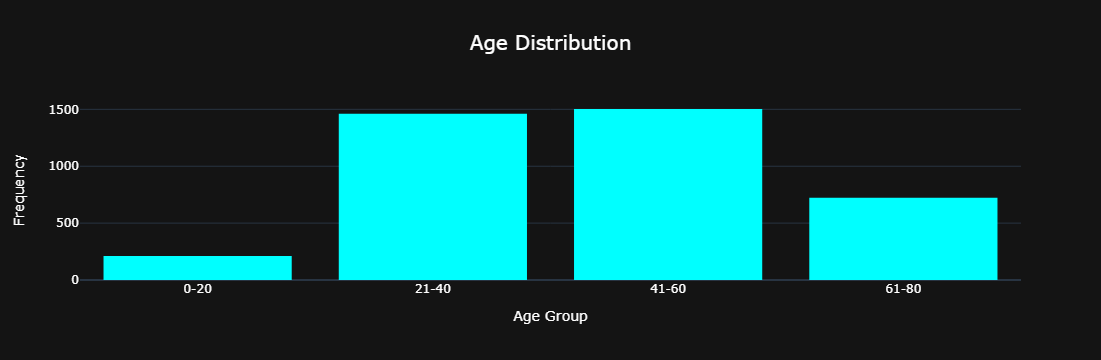

In [24]:
fig = px.histogram(
    data,
    x='Age Group',
    title="Age Distribution",
    labels={'Age Group': 'Age Group', 'count': 'Number of Customers'},
    template='plotly_dark',
    color_discrete_sequence=['cyan']
)
fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis_title="Age Group",
    yaxis_title="Frequency",
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(20, 20, 20, 1)',
    font=dict(color="white")
)
fig.show()


### Gender Distribution

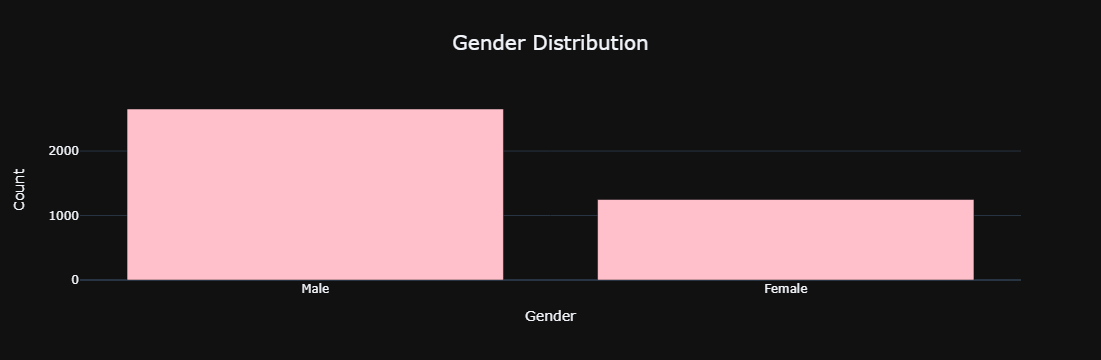

In [26]:
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Bar chart for Gender Distribution
fig = px.bar(
    gender_counts,
    x='Gender',
    y='Count',
    title="Gender Distribution",
    template='plotly_dark',
    color_discrete_sequence=['pink']
)
fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis_title="Gender",
    yaxis_title="Count"
)
fig.show()


### Purchase Amount by Gender

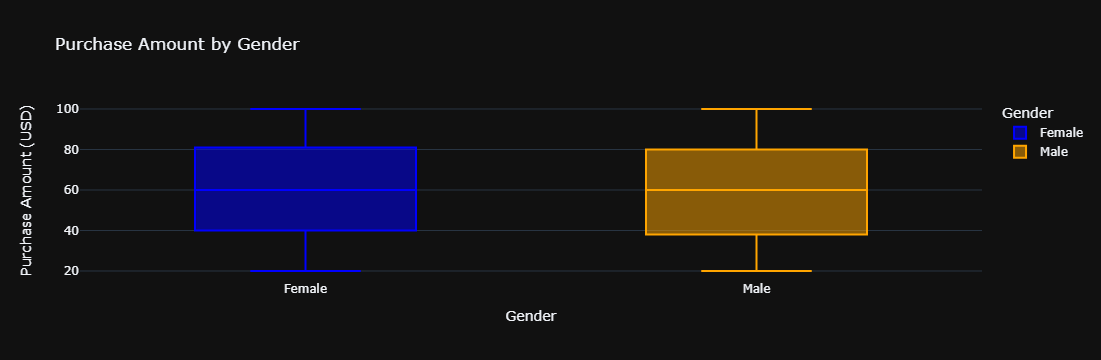

In [27]:
# Box plot for Purchase Amount by Gender
fig = px.box(
    data,
    x='Gender',
    y='Purchase Amount (USD)',
    title="Purchase Amount by Gender",
    template='plotly_dark',
    color='Gender',
    color_discrete_sequence=['blue', 'orange']
)
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Purchase Amount (USD)"
)
fig.show()


### Shopping Season Preference

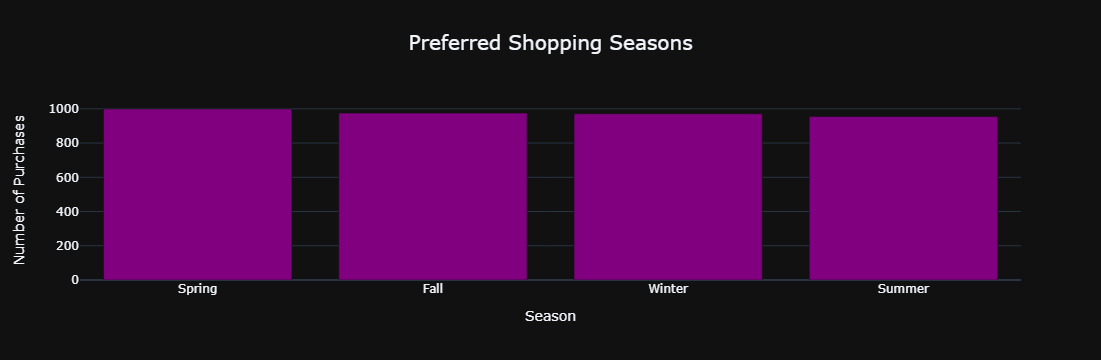

In [28]:
season_counts = data['Season'].value_counts().reset_index()
season_counts.columns = ['Season', 'Count']

# Bar chart for shopping season preference
fig = px.bar(
    season_counts,
    x='Season',
    y='Count',
    title="Preferred Shopping Seasons",
    template='plotly_dark',
    color_discrete_sequence=['purple']
)
fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis_title="Season",
    yaxis_title="Number of Purchases"
)
fig.show()


### Impact of Discounts

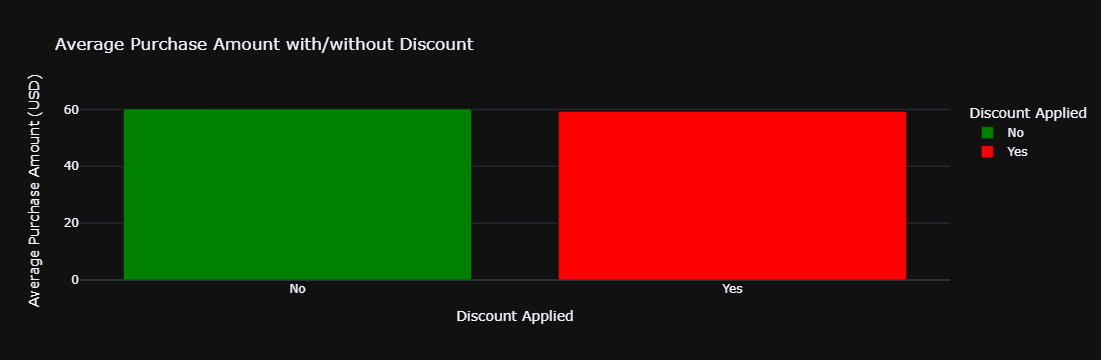

In [29]:
discount_avg = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

# Bar chart for Discount Impact
fig = px.bar(
    discount_avg,
    x='Discount Applied',
    y='Purchase Amount (USD)',
    title="Average Purchase Amount with/without Discount",
    template='plotly_dark',
    color='Discount Applied',
    color_discrete_sequence=['green', 'red']
)
fig.update_layout(
    xaxis_title="Discount Applied",
    yaxis_title="Average Purchase Amount (USD)"
)
fig.show()


In [30]:
# Save the cleaned dataset
output_file_path = 'F:\cleaned_shopping_trends.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")


Cleaned dataset saved to F:\cleaned_shopping_trends.csv
